In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse et Exploration

In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

### Analyse de la forme 

In [3]:
data = pd.read_excel("data/dataset.xlsx")
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [4]:
df = data.copy()

<AxesSubplot:ylabel='None'>

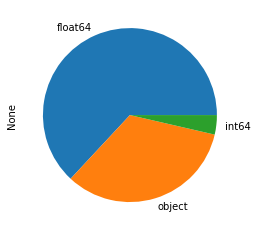

In [5]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

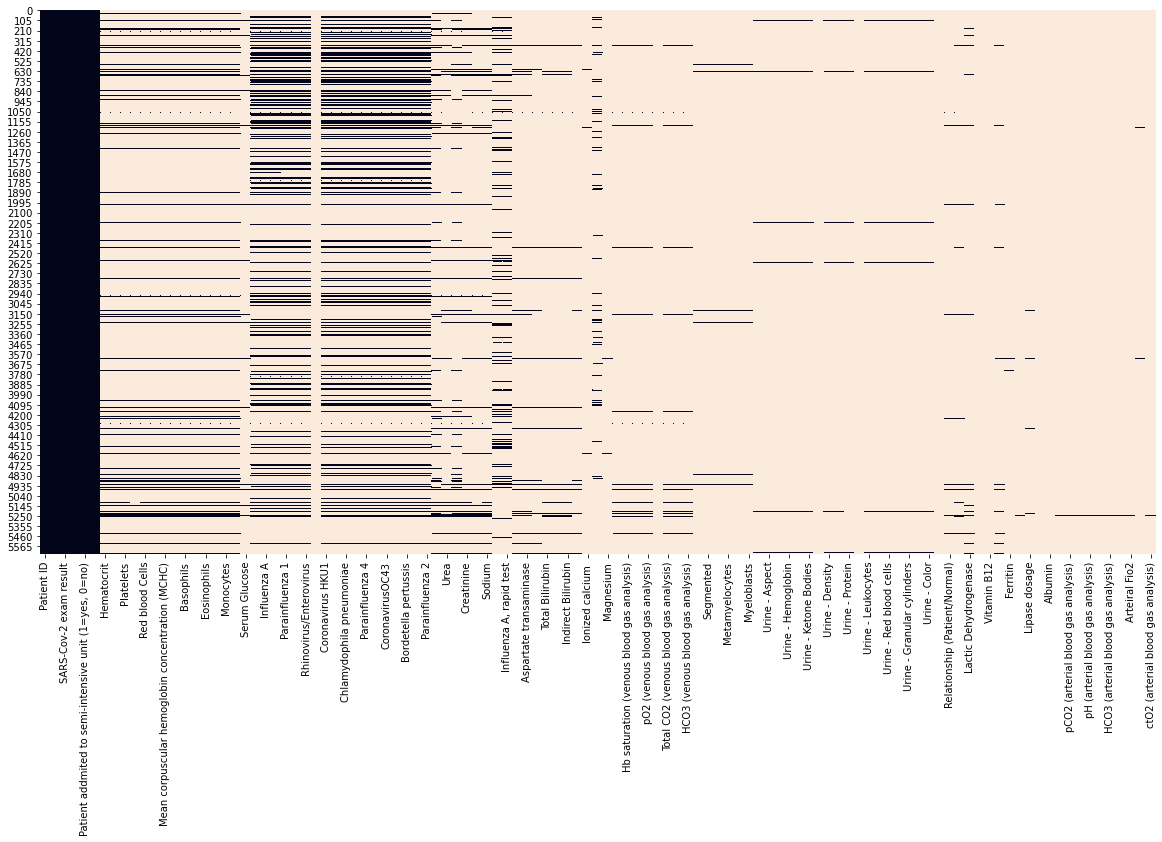

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [7]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Analyse du fond 

#### 1 - Visualisation de la target - Elimination des colonnes inutiles

In [8]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df = df.drop("Patient ID",axis=1)

In [9]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

#### 2 - Signification des différentes variables
####   Variables continues

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

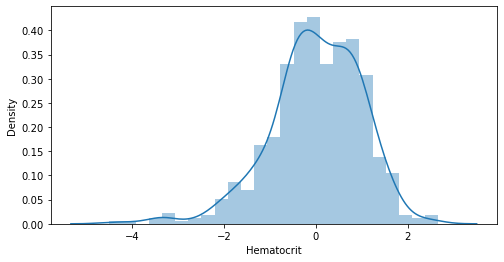

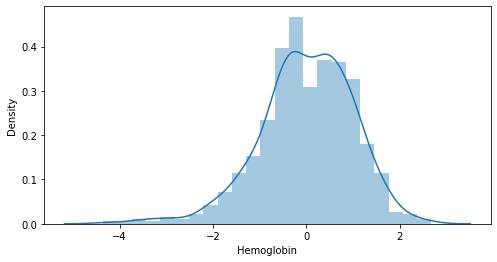

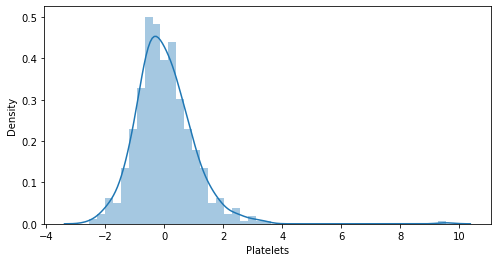

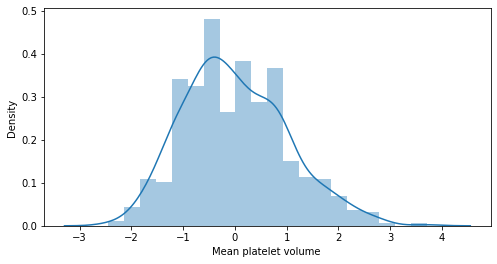

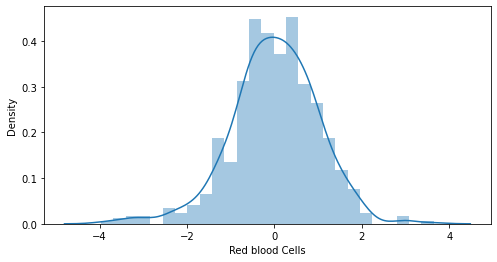

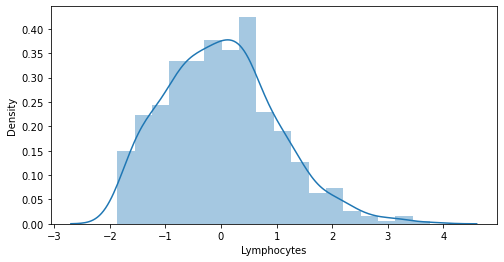

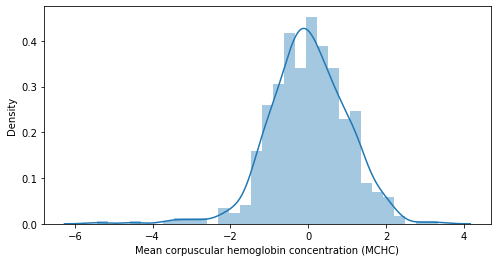

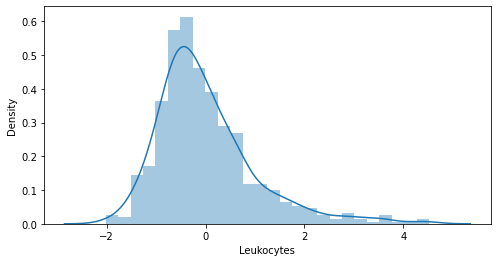

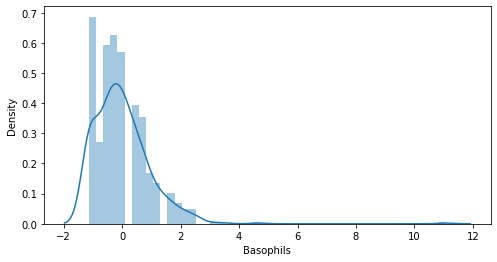

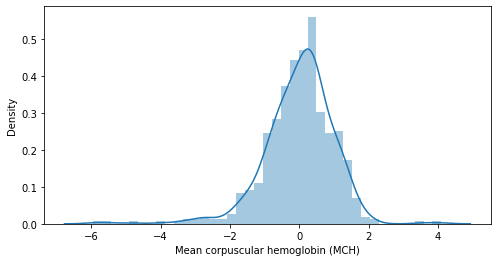

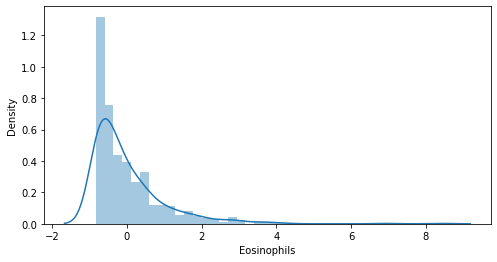

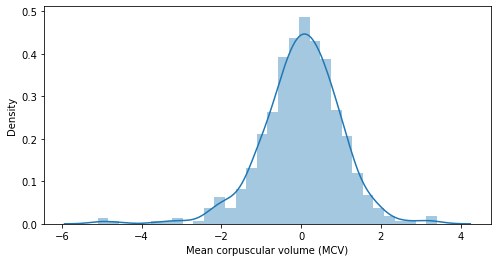

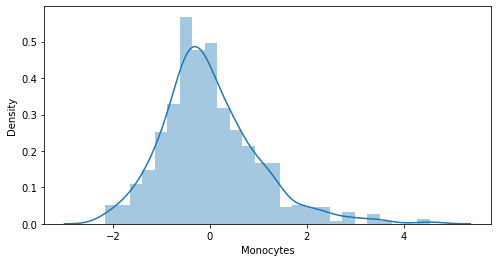

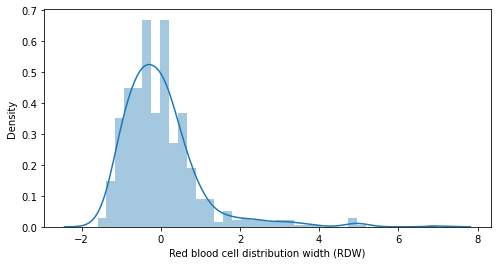

In [10]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(8,4))
    sns.distplot(df[col])

#### Variables Qualitatives

In [11]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50},{df[col].unique()}')

SARS-Cov-2 exam result----------------------------,['negative' 'positive']
Respiratory Syncytial Virus-----------------------,[nan 'not_detected' 'detected']
Influenza A---------------------------------------,[nan 'not_detected' 'detected']
Influenza B---------------------------------------,[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------,[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------,[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------,[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------,[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------,[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------,[nan 'not_detected' 'detected']
Adenovirus----------------------------------------,[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------,[nan 'not_detected' 'detected']
Coronavirus2

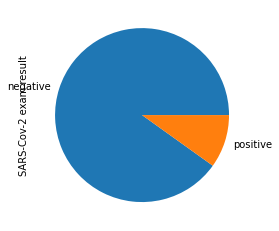

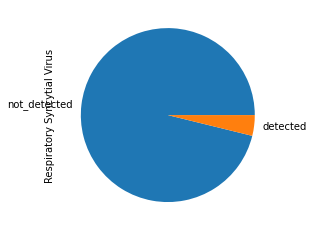

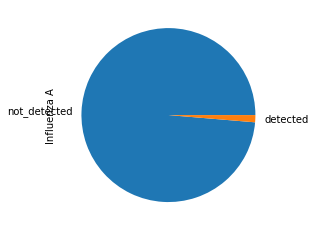

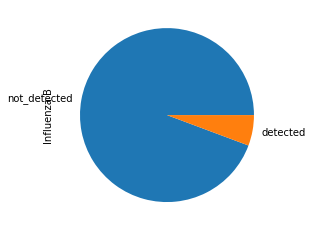

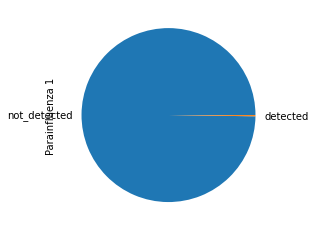

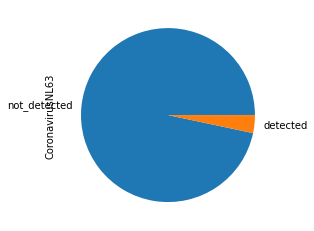

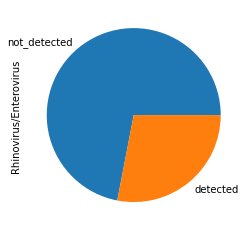

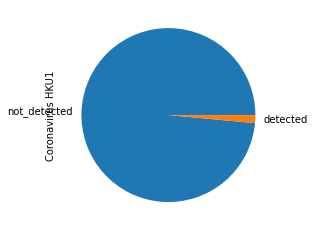

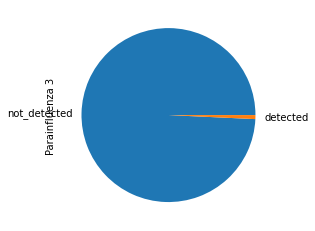

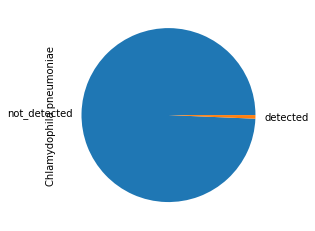

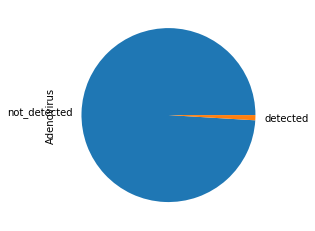

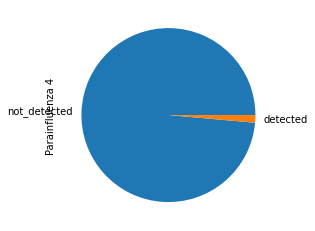

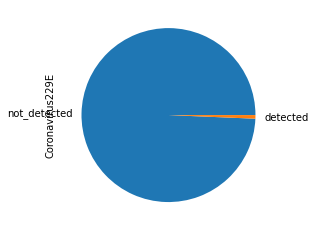

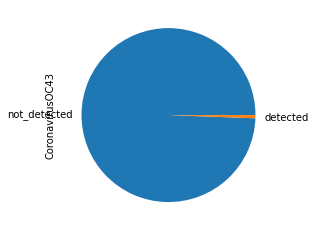

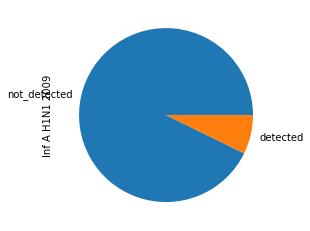

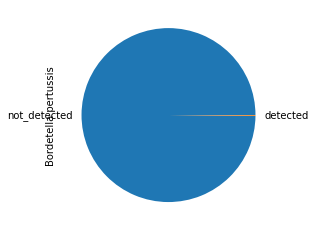

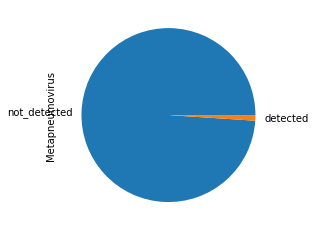

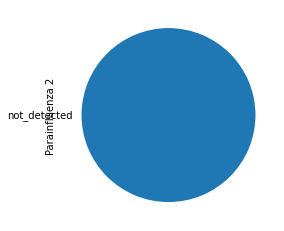

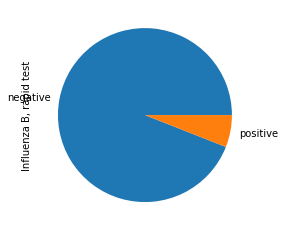

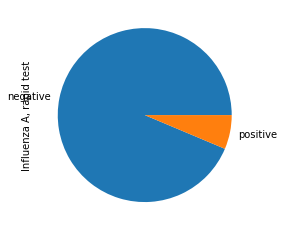

In [12]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

#### 3 - Relation entre feature et target

In [13]:
positif_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negatif_df = df[df['SARS-Cov-2 exam result'] == 'negative']

In [14]:
 ## Creation des ensembles : sanguin et viral correspondant aux deux categories distingué pendant analyse

In [15]:
pourcentage_nan = df.isna().sum()/df.shape[0]

In [16]:
sanguin_col = df.columns[(pourcentage_nan < 0.9) & (pourcentage_nan >0.88)]
viral_col = df.columns[(pourcentage_nan < 0.88) & (pourcentage_nan >0.75)] 

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

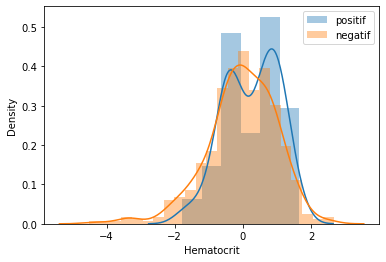

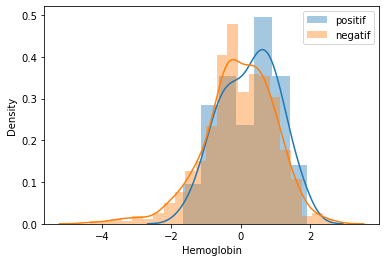

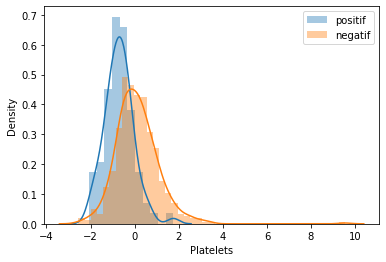

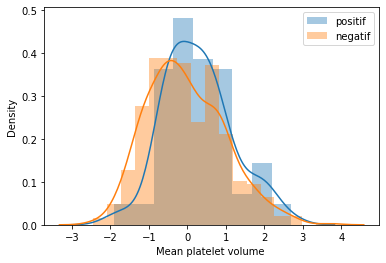

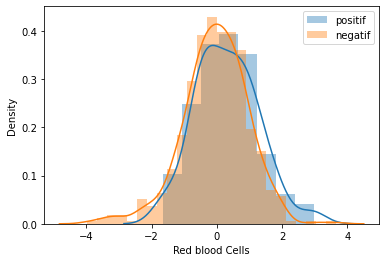

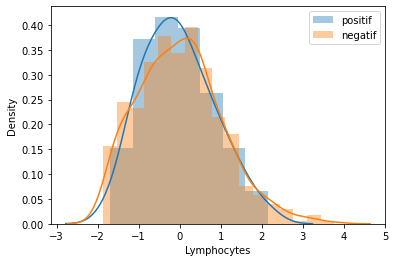

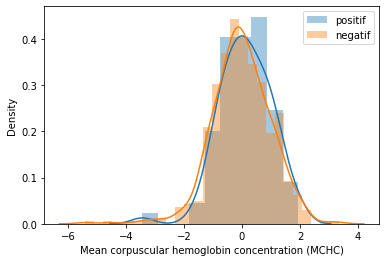

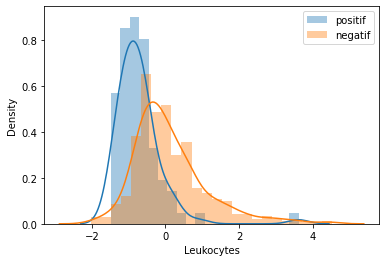

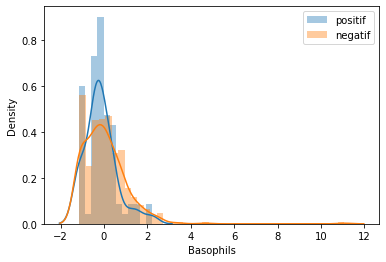

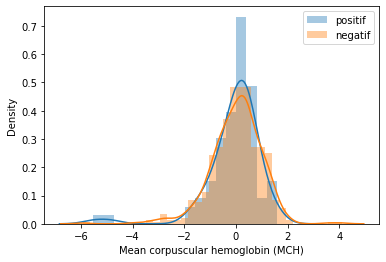

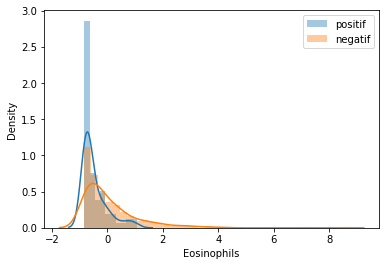

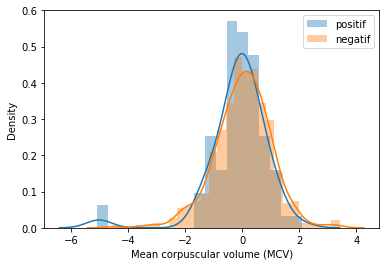

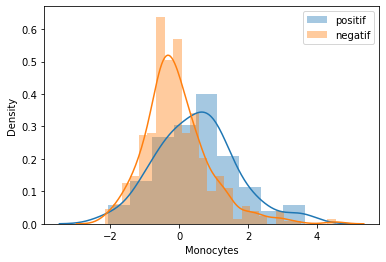

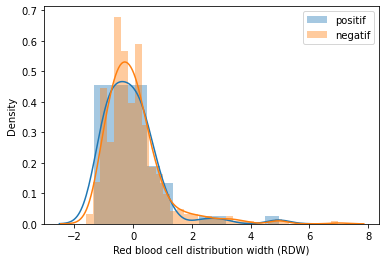

In [17]:
## Relation entre les tests sanguins et les résultats

for col in sanguin_col:
    plt.figure()
    sns.distplot(positif_df[col],label='positif')
    sns.distplot(negatif_df[col],label='negatif')
    plt.legend()

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

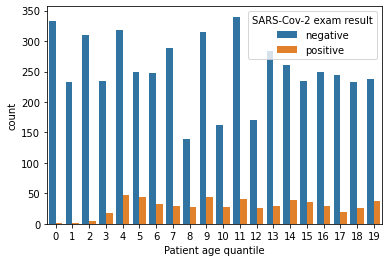

In [18]:
## Relation entre l'age  et les résultats
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

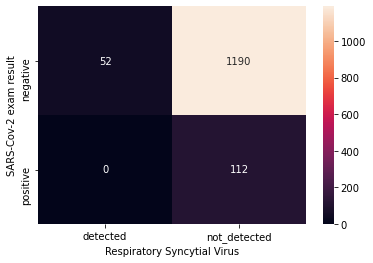

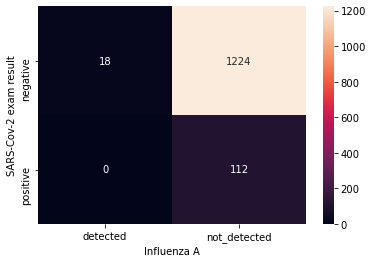

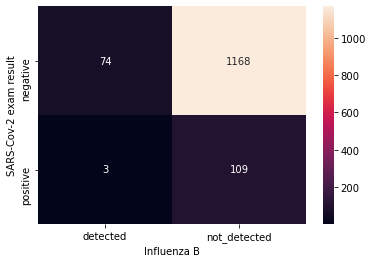

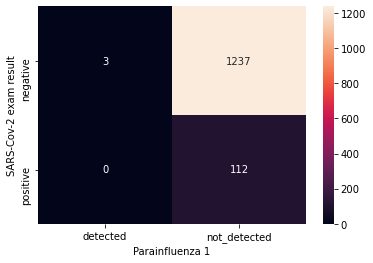

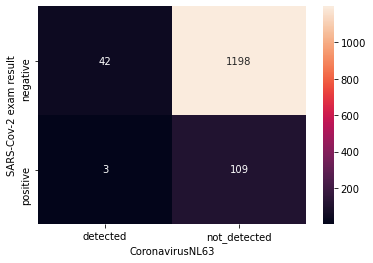

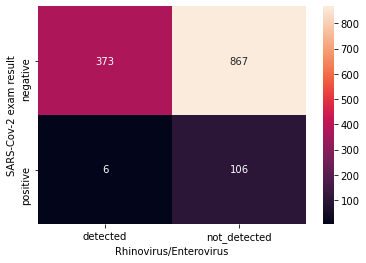

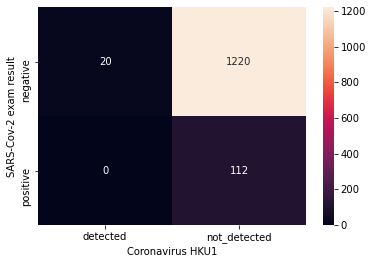

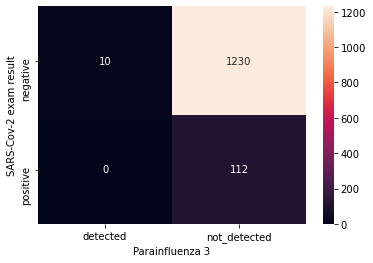

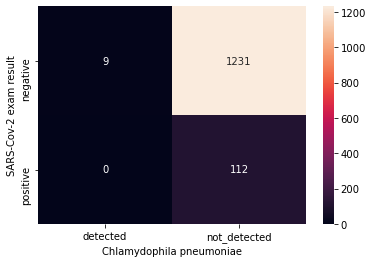

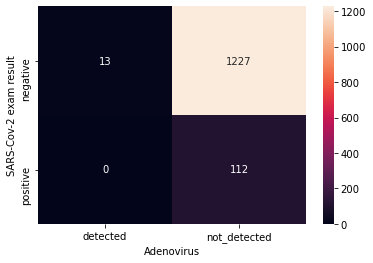

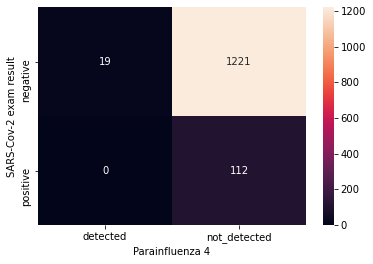

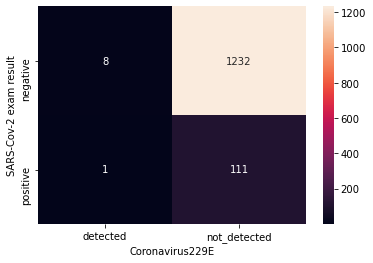

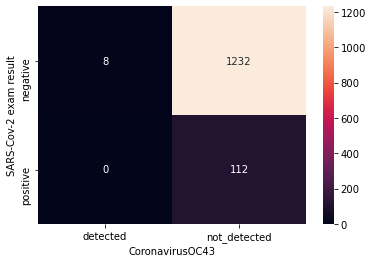

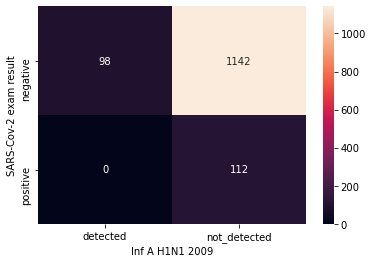

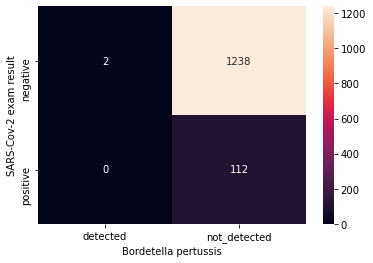

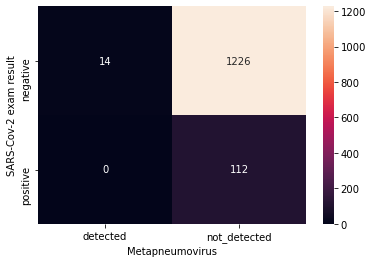

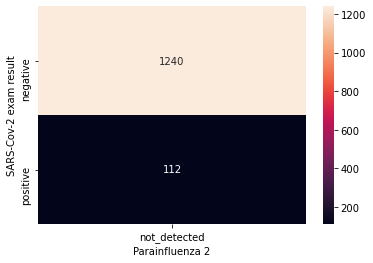

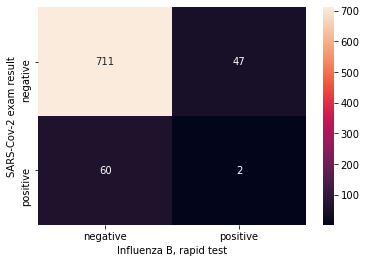

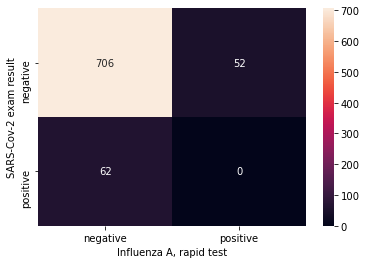

In [19]:
## Relation entre viral et les résultats
for col in viral_col:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')

## Analyse détaillé
### Relation variables/variables
#### sanguin/sanguin

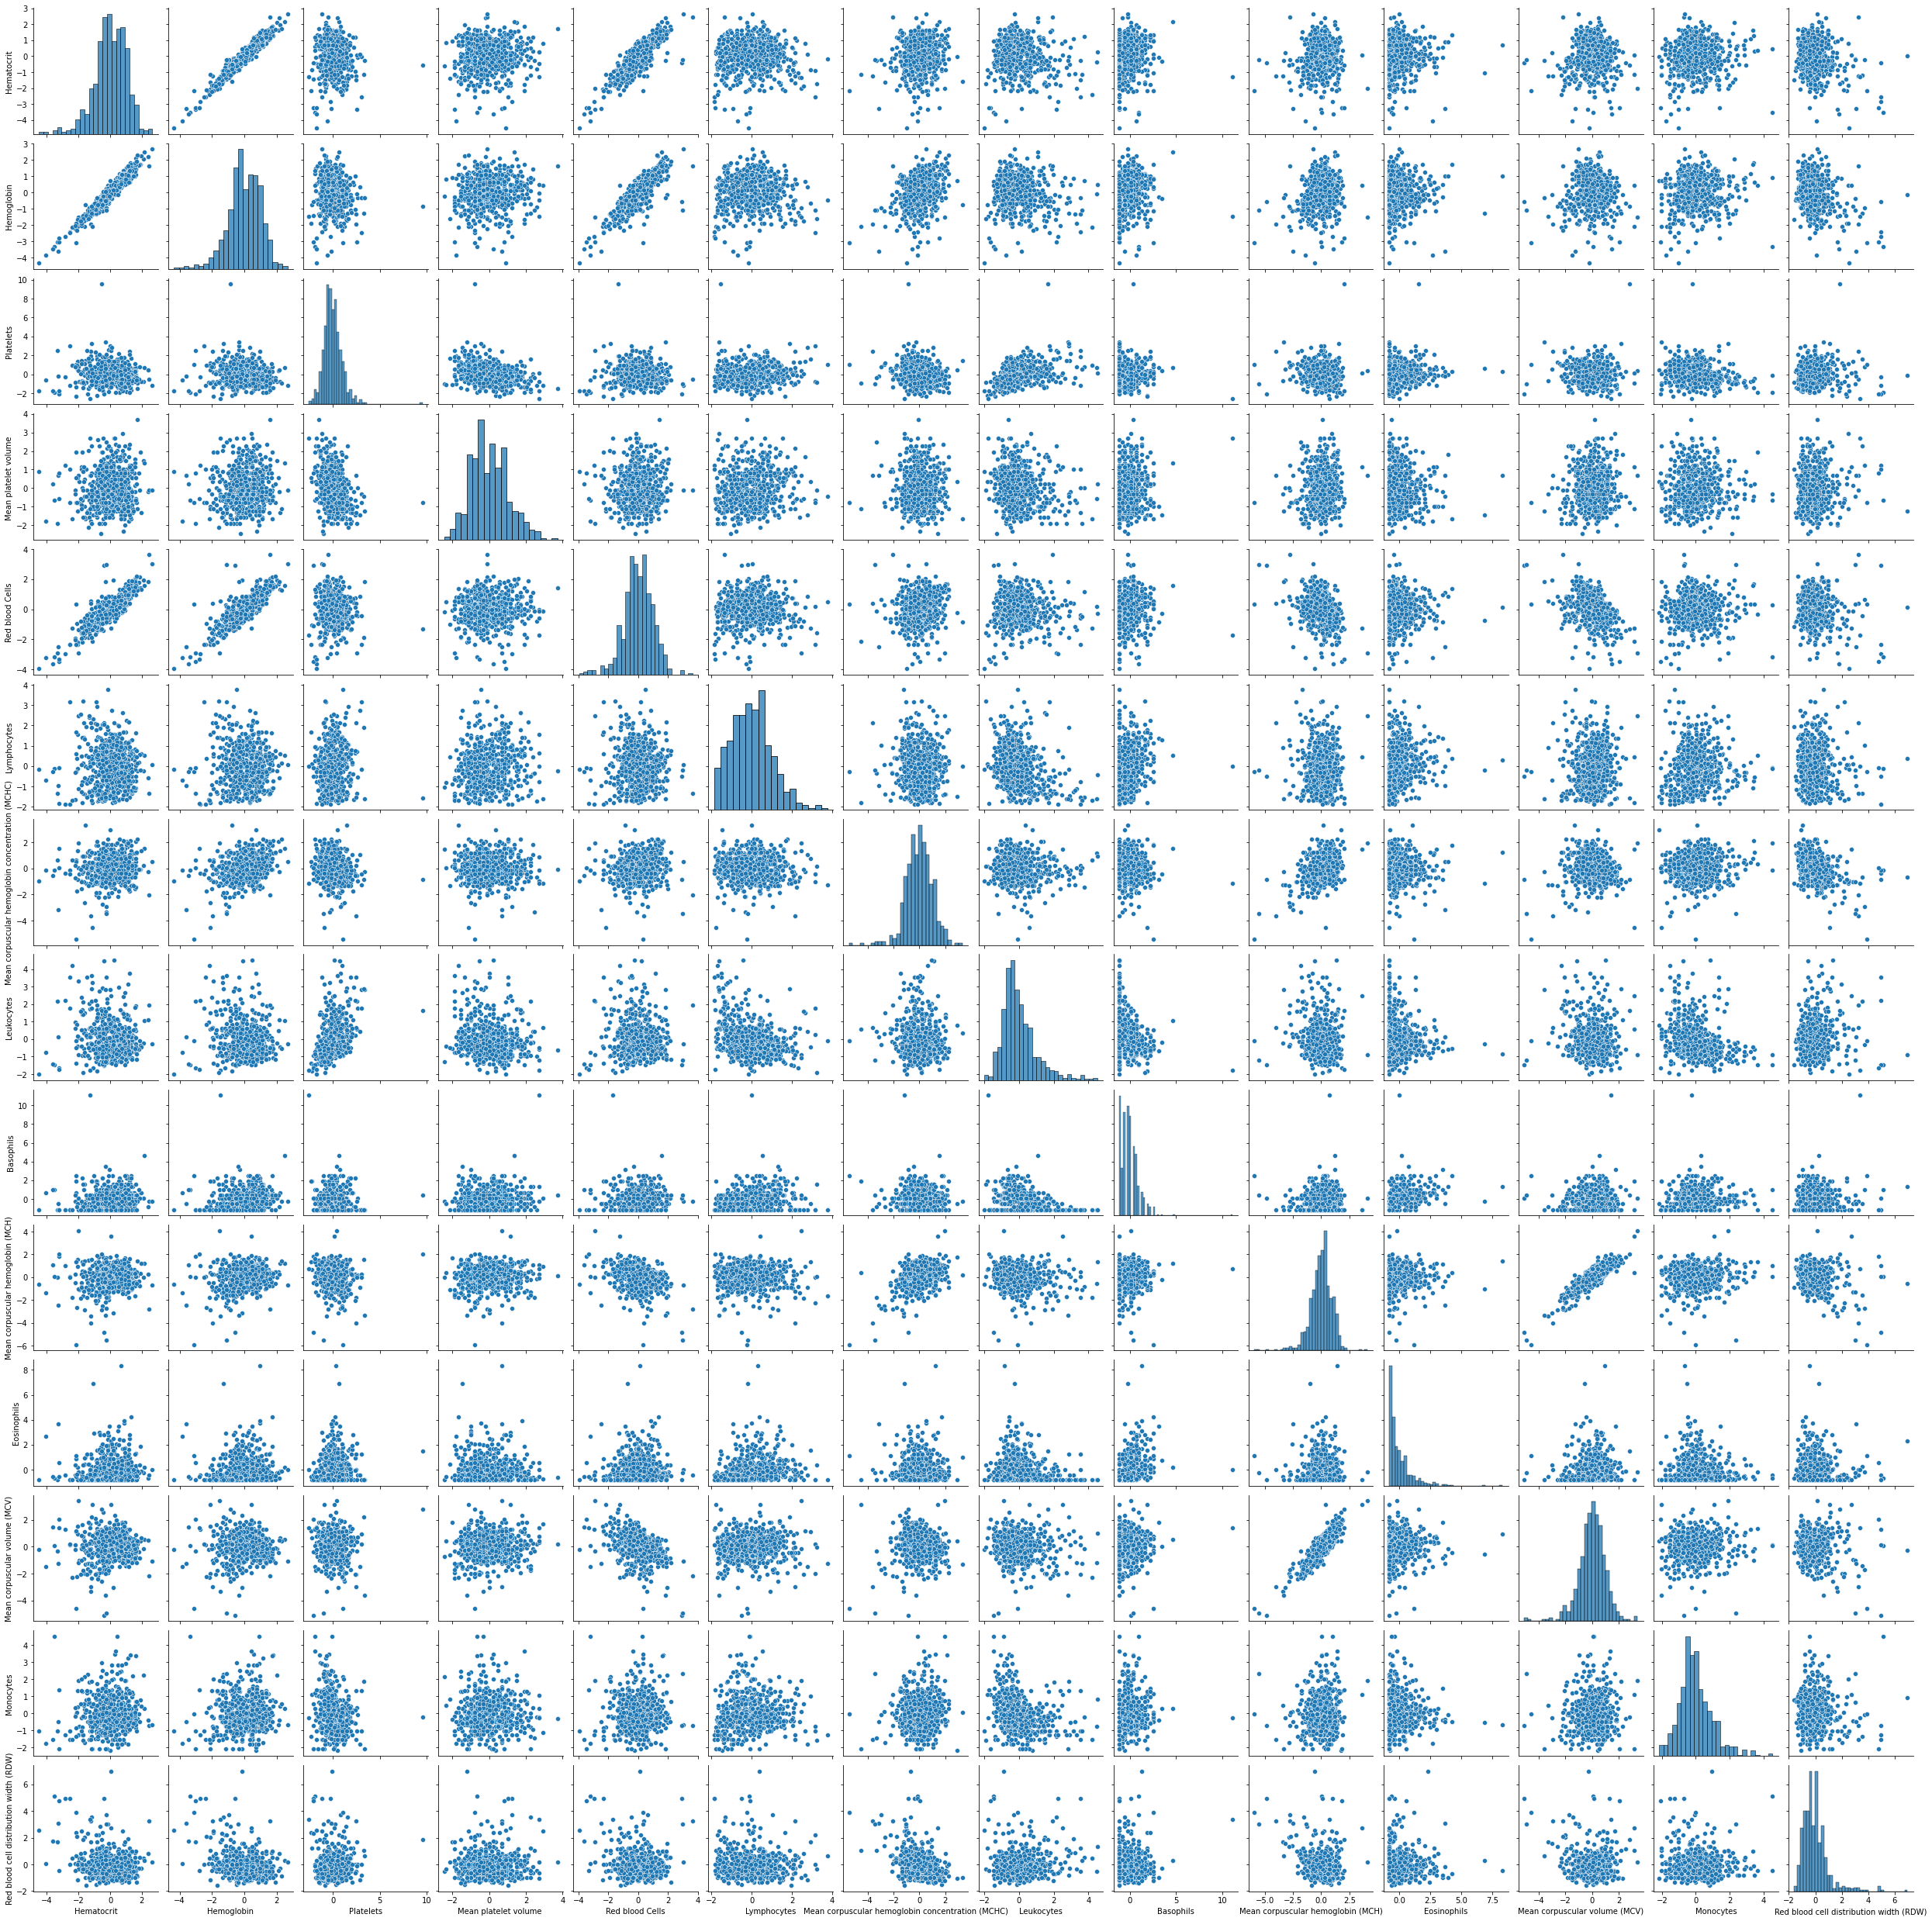

In [20]:
sns.pairplot(df[sanguin_col]) 

<AxesSubplot:>

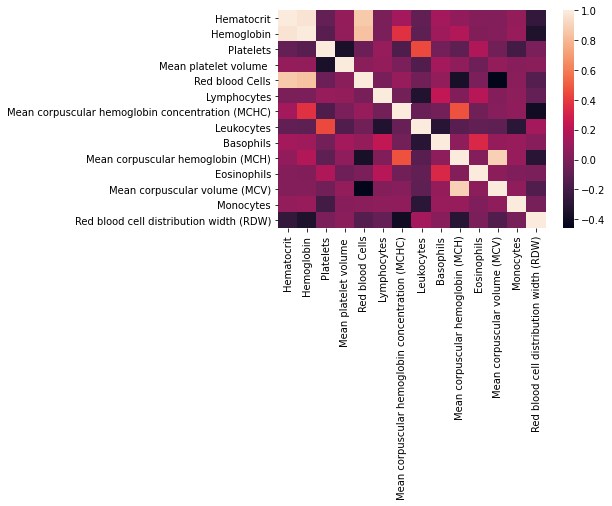

In [21]:
sns.heatmap(df[sanguin_col].corr())

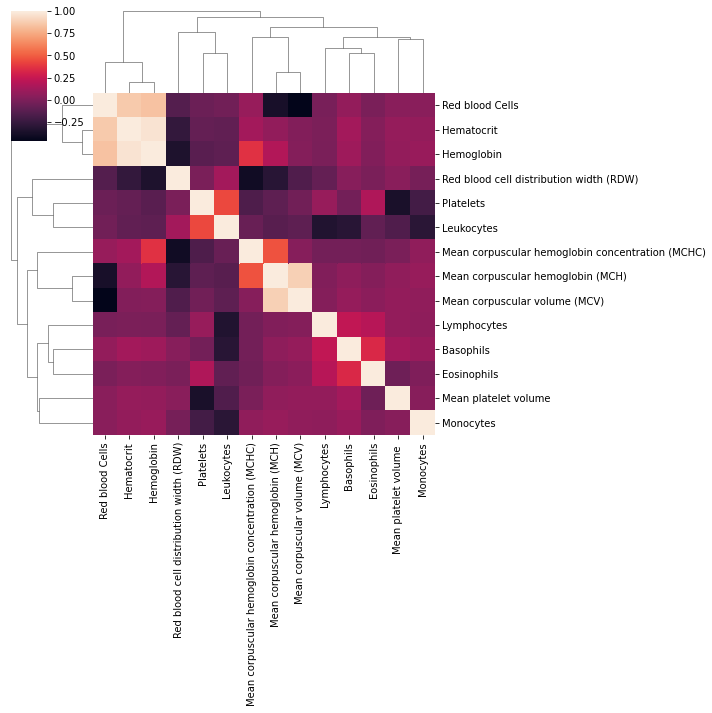

In [22]:
# Bien voir les corrélations
sns.clustermap(df[sanguin_col].corr())

####  Age/sanguin

/home/ferdio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

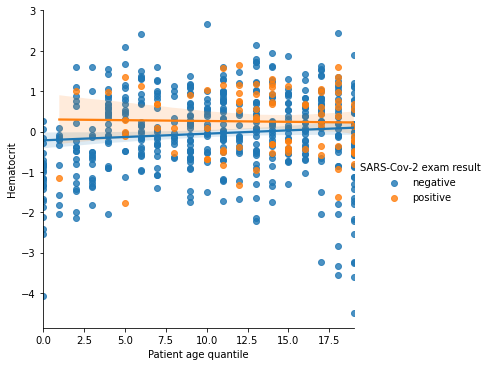

<Figure size 432x288 with 0 Axes>

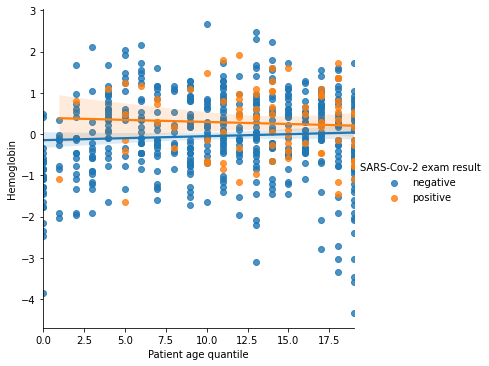

<Figure size 432x288 with 0 Axes>

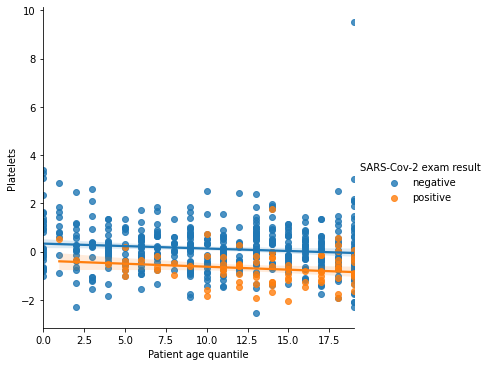

<Figure size 432x288 with 0 Axes>

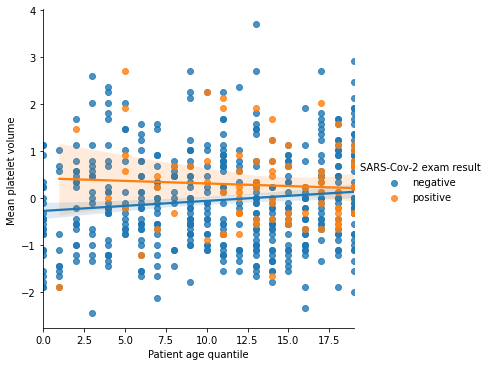

<Figure size 432x288 with 0 Axes>

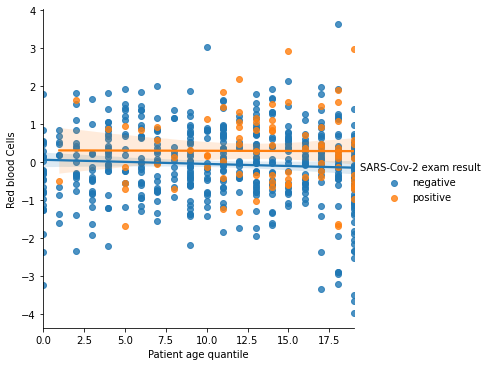

<Figure size 432x288 with 0 Axes>

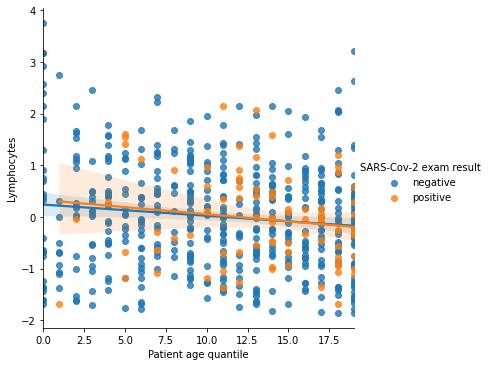

<Figure size 432x288 with 0 Axes>

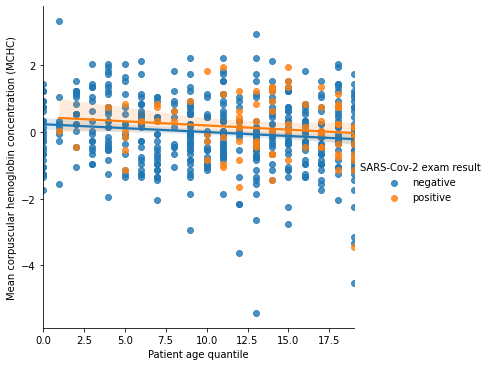

<Figure size 432x288 with 0 Axes>

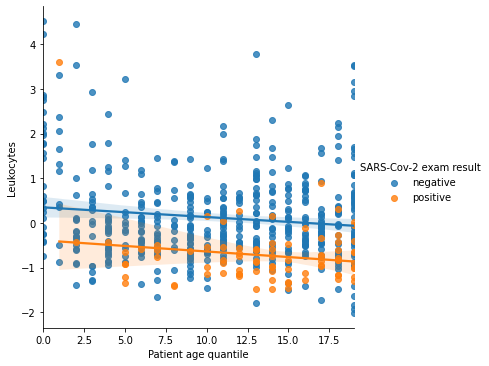

<Figure size 432x288 with 0 Axes>

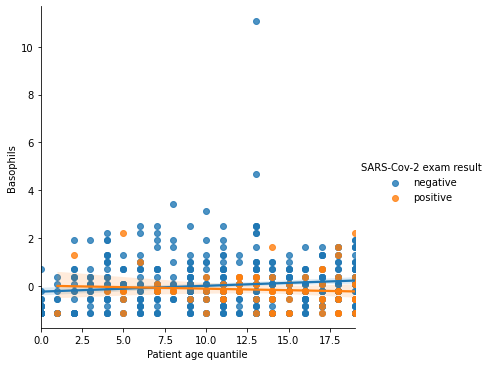

<Figure size 432x288 with 0 Axes>

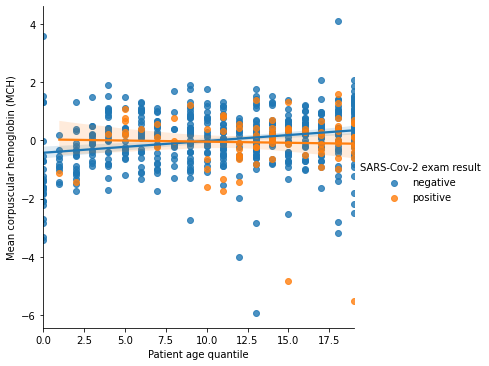

<Figure size 432x288 with 0 Axes>

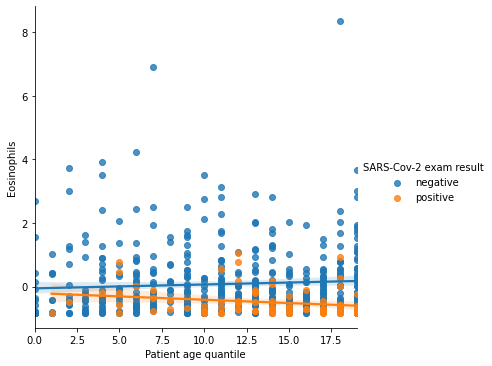

<Figure size 432x288 with 0 Axes>

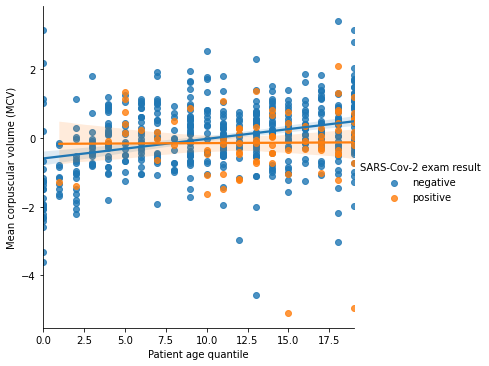

<Figure size 432x288 with 0 Axes>

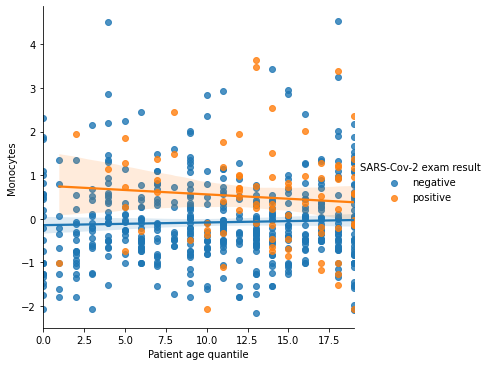

<Figure size 432x288 with 0 Axes>

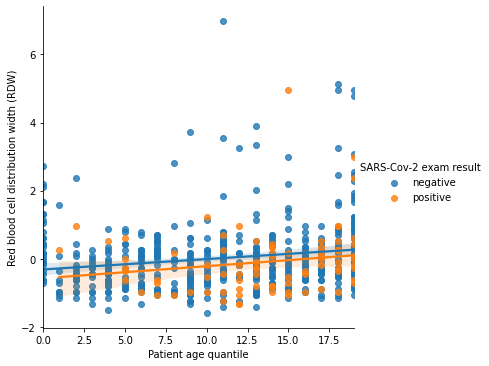

In [23]:
for col in sanguin_col:
    plt.figure()
    sns.lmplot(x='Patient age quantile',hue='SARS-Cov-2 exam result', y=col, data=df)

In [24]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

#### Maladie/Sanguin

In [25]:
df['malade'] = np.sum(df[viral_col[:-2]] == 'detected',axis=1) > 1
malade_df = df[df['malade'] == True]
non_malade_df = df[df['malade'] == False]

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


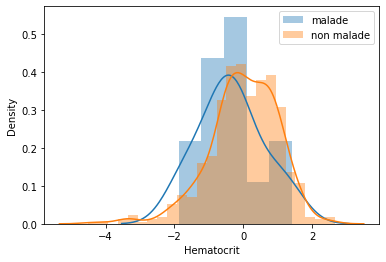

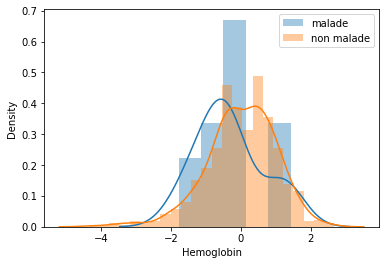

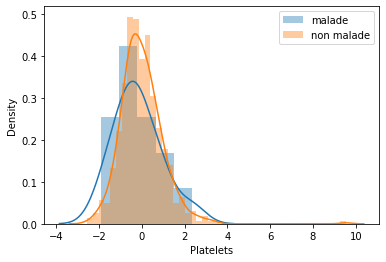

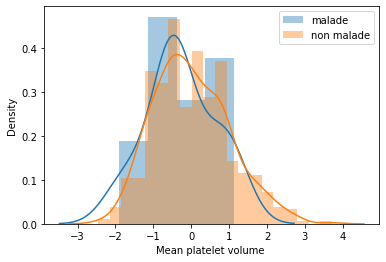

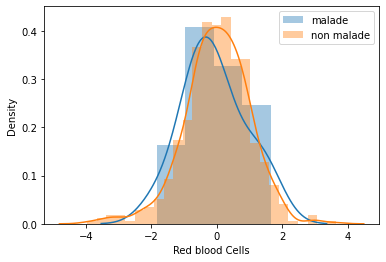

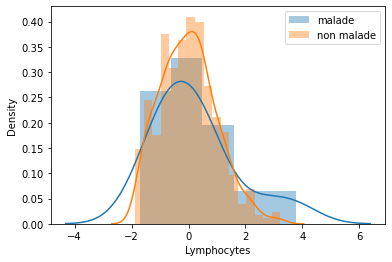

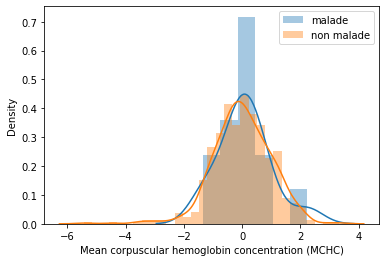

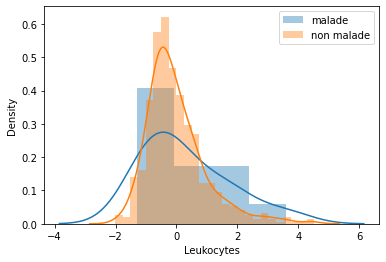

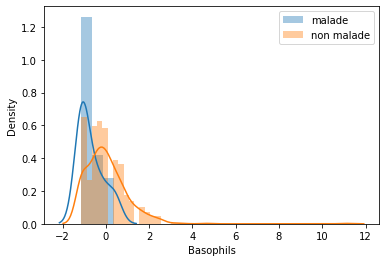

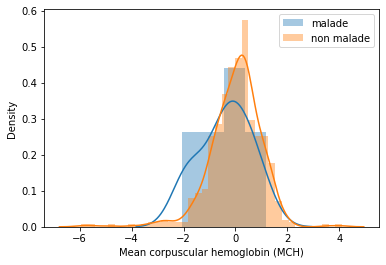

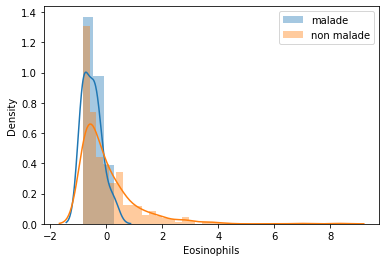

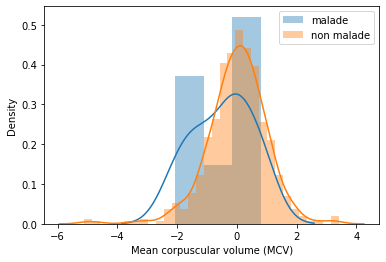

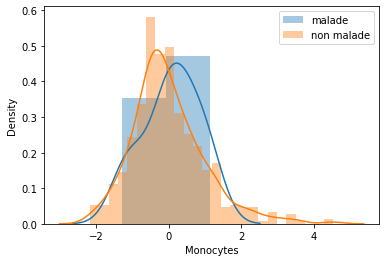

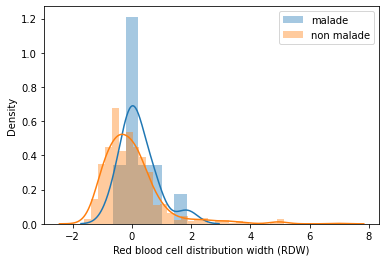

In [26]:
for col in sanguin_col:
    plt.figure()
    sns.distplot(malade_df[col],label='malade')
    sns.distplot(non_malade_df[col],label='non malade')  
    plt.legend()

In [27]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensifs'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [28]:
df['statut'] = df.apply(hospitalisation,axis=1)

In [29]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

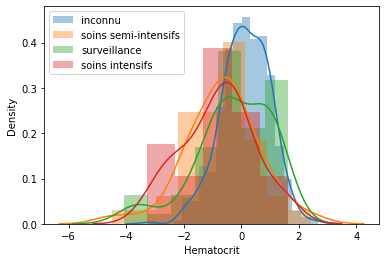

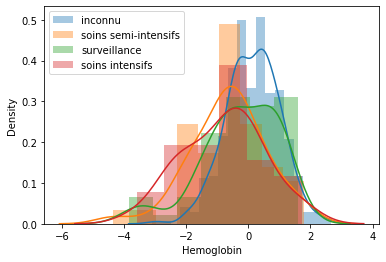

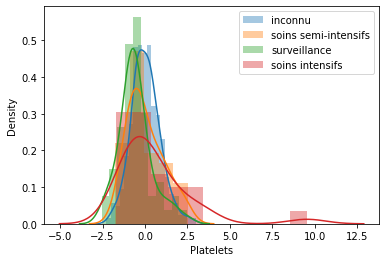

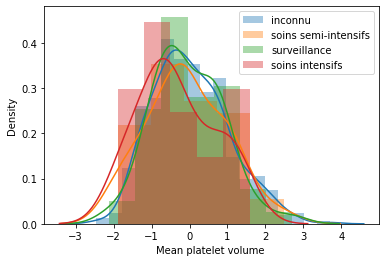

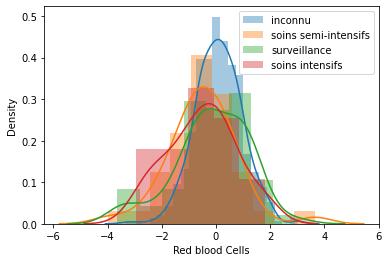

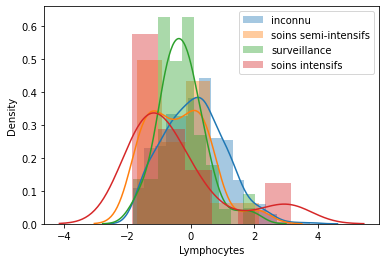

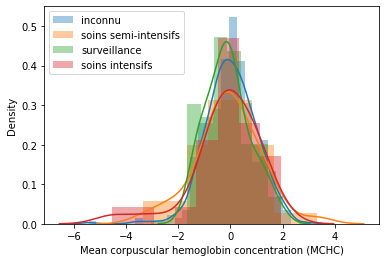

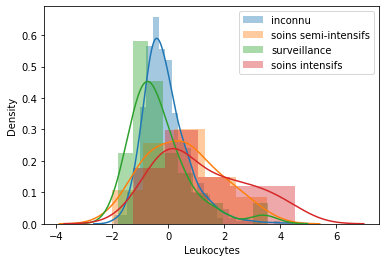

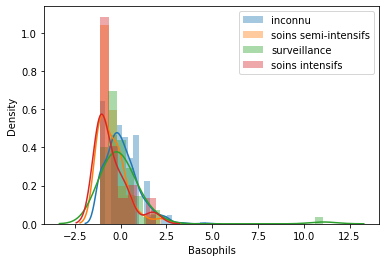

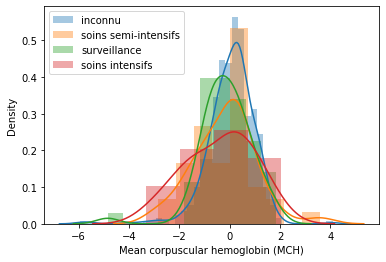

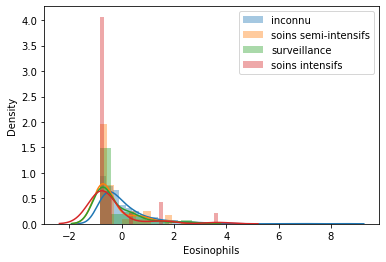

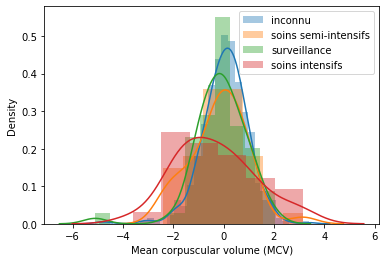

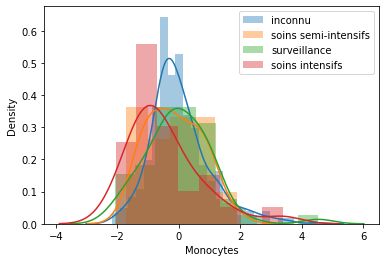

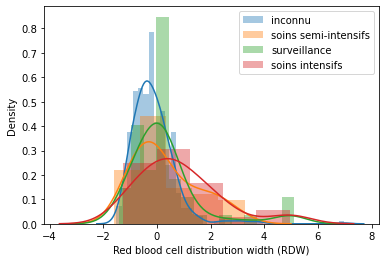

In [30]:
for col in sanguin_col:
    plt.figure()
    for sts in df['statut'].unique():
        st = df['statut']==sts
        sns.distplot(df[st][col],label=sts)
    plt.legend()

#### Vérification des hypothèses

### Preprocessing 

In [55]:
df1 = data.copy()
pourcentage_nan = df1.isna().sum()/df1.shape[0]
sanguin_col = list(df1.columns[(pourcentage_nan < 0.9) & (pourcentage_nan >0.88)])
viral_col = list(df1.columns[(pourcentage_nan < 0.88) & (pourcentage_nan >0.75)] )

In [103]:
key_columns = ['Patient age quantile','SARS-Cov-2 exam result']
df1 = df1[key_columns+sanguin_col+viral_col]

#### Trainset,TestSet - Nettoyage - Encodage

In [104]:
from sklearn.model_selection import train_test_split

In [98]:
trainset,testset = train_test_split(df1,test_size=0.2,random_state=0)

In [106]:
def encodage(df1):
    code = {"positive":1,
       "negative":0,
       "detected":1,
       "not_detected":0}
    for col in df1.select_dtypes('object').columns:
        df1.loc[:,col] = df1[col].map(code)
    return df1

In [150]:
def feature_engineering(df1):
    df1['est malade'] = df1[viral_col].sum(axis=1) >= 1
    df1 = df1.drop(viral_col,axis=1)
    return df1

In [155]:
def imputation(df1):
    df1 = df1.dropna(axis=0)
    return df1

In [156]:
def preprocessing(df1):
    df1 = encodage(df1)
    df1 = feature_engineering(df1)
    df1 = imputation(df1)
    x = df1.drop('SARS-Cov-2 exam result',axis=1) 
    y = df1['SARS-Cov-2 exam result']
    print(y.value_counts())    
    return x,y   

In [157]:
xtrain,ytrain = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [158]:
xtest,ytest = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


### Modelisation 

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif

In [1]:
preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif, k=10))

NameError: name 'make_pipeline' is not defined

In [238]:
RandomForest = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
ArbreDecision = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())                             

In [239]:
listModels = {'RandomForest':RandomForest,
             'ArbreDecision':ArbreDecision,
             'AdaBoost':AdaBoost,
             'Svm':Svm,
             'KNN':KNN}

RandomForest
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

ArbreDecision
[[86  9]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        95
           1       0.36      0.31      0.33        16

    accuracy                           0.82       111
   macro avg       0.62      0.61      0.61       111
weighted avg       0.81      0.82      0.81       111

AdaBoost
[[90  5]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.55      0.38      0.44        16

    accuracy                           0.86       111
   macro avg       0.72      0.66  

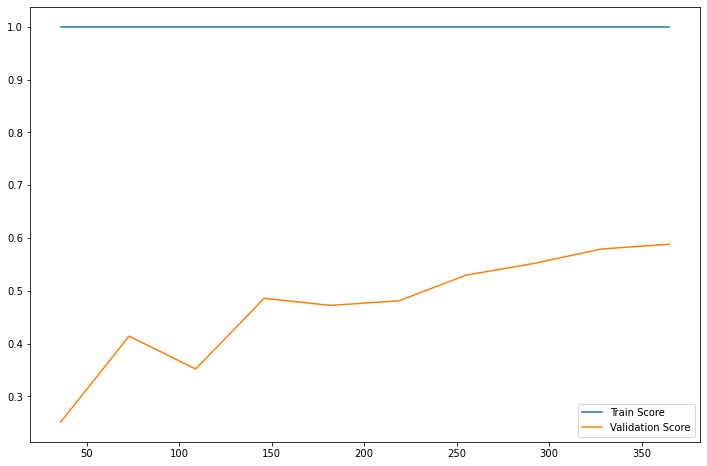

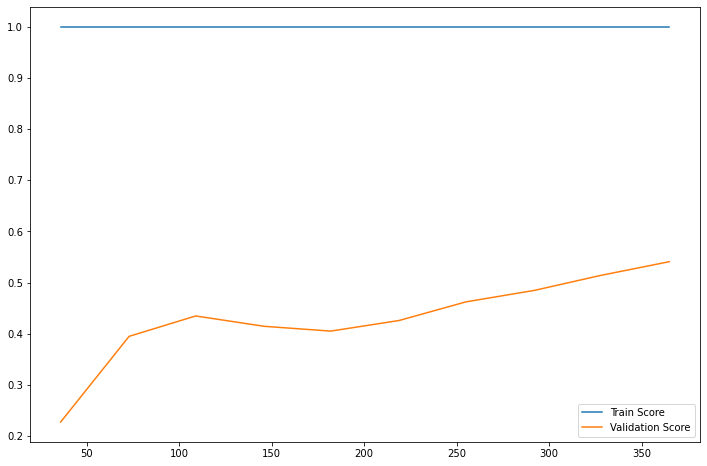

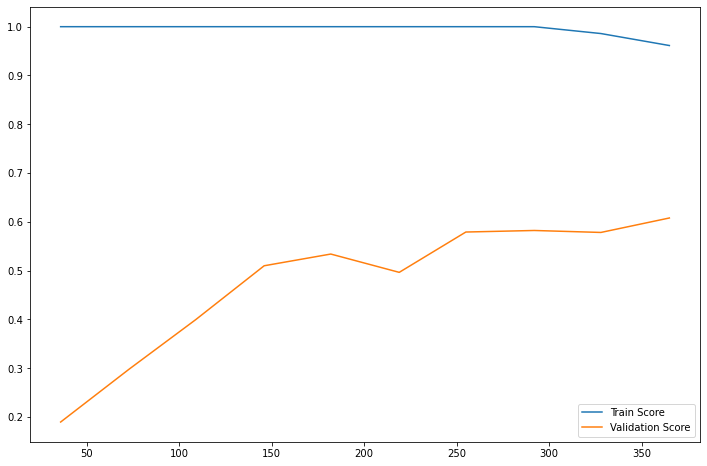

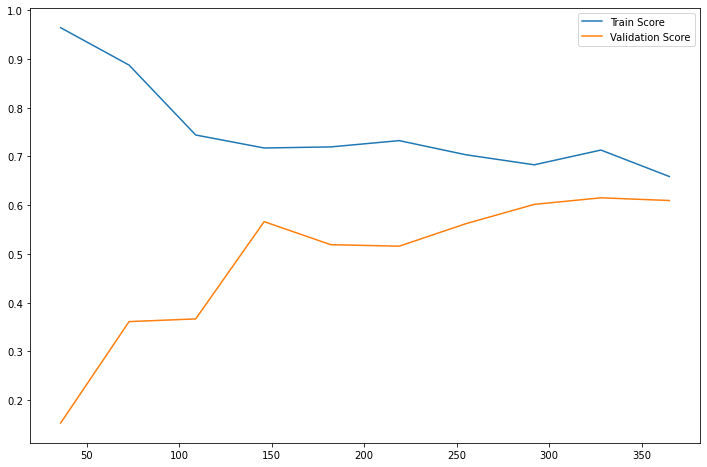

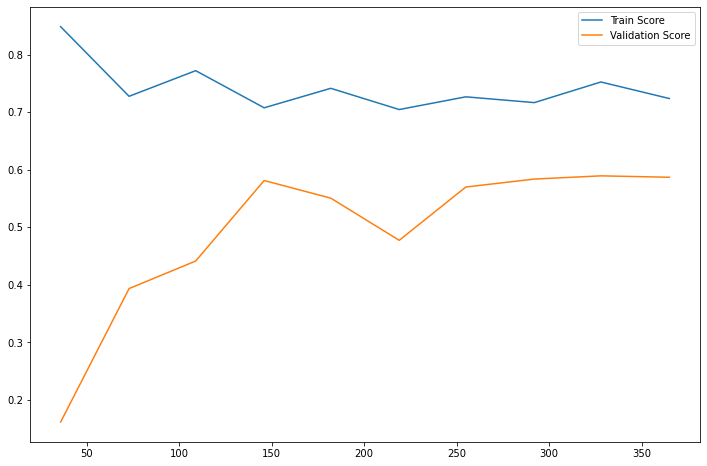

In [240]:
for name , model in listModels.items():
    print(name)
    evaluation(model)

### Optimisation du KNN

In [241]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [242]:
# KNN
params = {'kneighborsclassifier__n_neighbors':np.arange(1,20),
             'kneighborsclassifier__metric':['euclidean','manhattan']
}

In [270]:
gridk = GridSearchCV(KNN,params,scoring='recall',cv=4)
gridk.fit(xtrain,ytrain)
print(gridk.best_params_)
ypred = gridk.predict(xtest)
print(classification_report(ytest,ypred))

{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 17}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



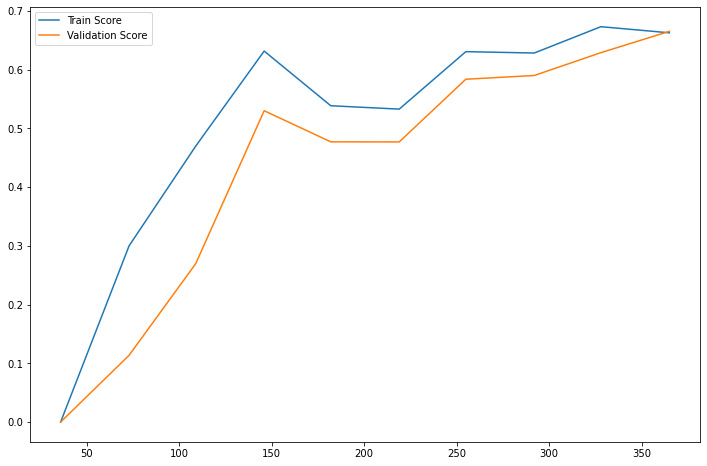

In [272]:
evaluation(gridk.best_estimator_)

### Optimisation du SVM

In [245]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [259]:
SVM.get_params()

<bound method Pipeline.get_params of Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])>

In [247]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [248]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)
grid.fit(xtrain, ytrain)
print(grid.best_params_)
y_pred = grid.predict(xtest)
print(classification_report(ytest, y_pred))

{'svc__gamma': 0.0005, 'svc__C': 3000, 'pipeline__selectkbest__k': 48, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        95
           1       0.56      0.62      0.59        16

    accuracy                           0.87       111
   macro avg       0.75      0.77      0.76       111
weighted avg       0.88      0.87      0.88       111



[[87  8]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        95
           1       0.56      0.62      0.59        16

    accuracy                           0.87       111
   macro avg       0.75      0.77      0.76       111
weighted avg       0.88      0.87      0.88       111



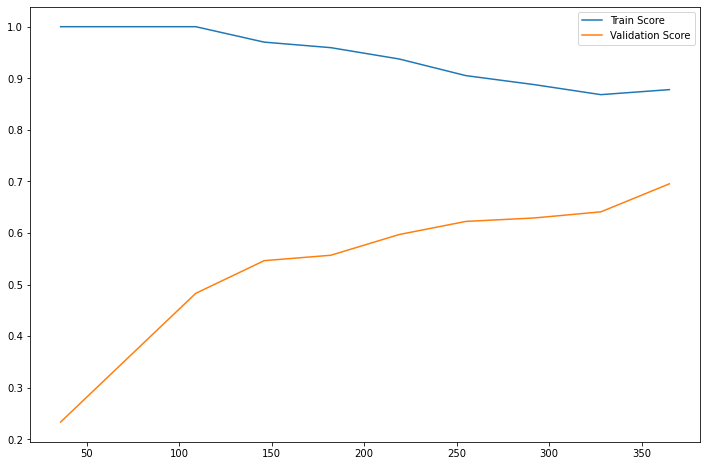

In [249]:
evaluation(grid.best_estimator_)

### Precision Recall Curve

In [260]:
from sklearn.metrics import precision_recall_curve

In [274]:
precision, recall, threshold = precision_recall_curve(ytest, grid.best_estimator_.decision_function(xtest))

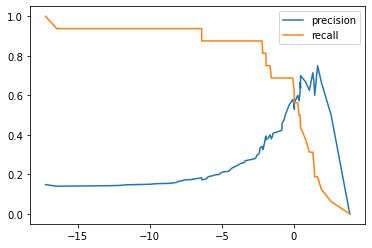

In [275]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [276]:
def model_final(model,X,threshold=0):
    return model.decision_function(X) > threshold

In [277]:
y_pred = model_final(grid.best_estimator_,xtest,threshold=-1)

In [278]:
f1_score(ytest,y_pred)

0.5238095238095238

In [279]:
from sklearn.metrics import recall_score

In [280]:
recall_score(ytest,ypred)

0.4375

#### Procédure d'evaluation

In [250]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.model_selection import learning_curve

In [255]:
def evaluation(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))
    
    N , train_score ,val_score = learning_curve(model,xtrain,ytrain,
                                               cv=4,scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='Train Score')
    plt.plot(N,val_score.mean(axis=1),label='Validation Score') 
    plt.legend()

[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



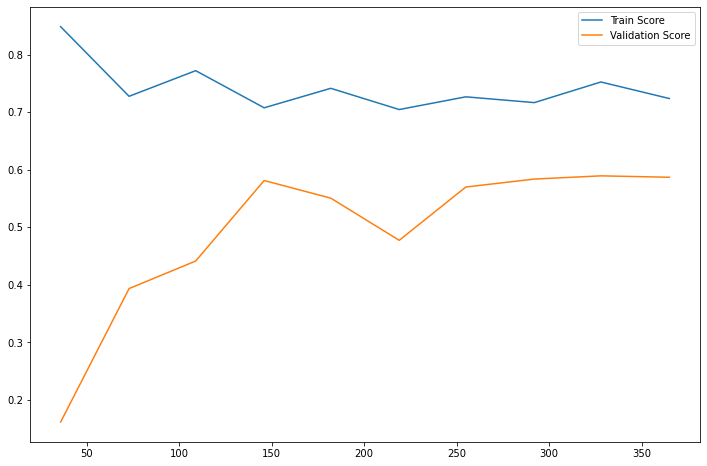

In [258]:
evaluation(model)

In [183]:
#pd.DataFrame(model.feature_importances_,index=xtrain.columns).plot.bar(figsize=(12,8))

###  Analyse de la forme : Taf

- **Identification de la target** : SARS-Cov-2 exam result
- **Nombres de lignes et de colonnes** : 5644,111
- **Types de variables** : qualitative : 70 , quantitative : 41
- **Identification des valeurs manquantes** : 
    - Beaucoup de variables manquantes(nombreux des variables ont un pourcentage de valeurs manquantes > 90%),
    - Deux groupes de données**: les 76% -> test Viral et les 89% -> test Sanguin

###  Analyse du fond : Taf

- **Visualisation de la target (Histogramme : VC / Boxplot : VD)**
  - 90% de négativité et 10% de positivité
- **Compréhension des différentes variables (Internet)**
  - Les variables quantitaives continue suivent tous malgré quelques un,une distribution normale 
  - Les variables qualitatives sont tous presque booleens(0,1)
- **Visualisation des relations features-target (Histogramme/Boxplot)**
  - target/blood aux de mpnocytes ,platelets,leukocytes semnblent liés au covid19
  - target/age : hummm
  - target/viral : on peut avoir 2 virus en meme temps
- **Identification des outliers**  
###  Analyse plus détaillée
- ** Relation variale/variable (sanguin/sanguin) : Certains variables sont très corrélés
- ** Relation variale/variable (age/sanguin) : pas de corrélation  (très faible )
- ** Relation variale/variable (maladie/sanguin) : le taux sanguin entre malade et covidien est diferent 